In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
df = pd.read_csv('data_comexstat.csv', encoding='ISO-8859-1')

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']

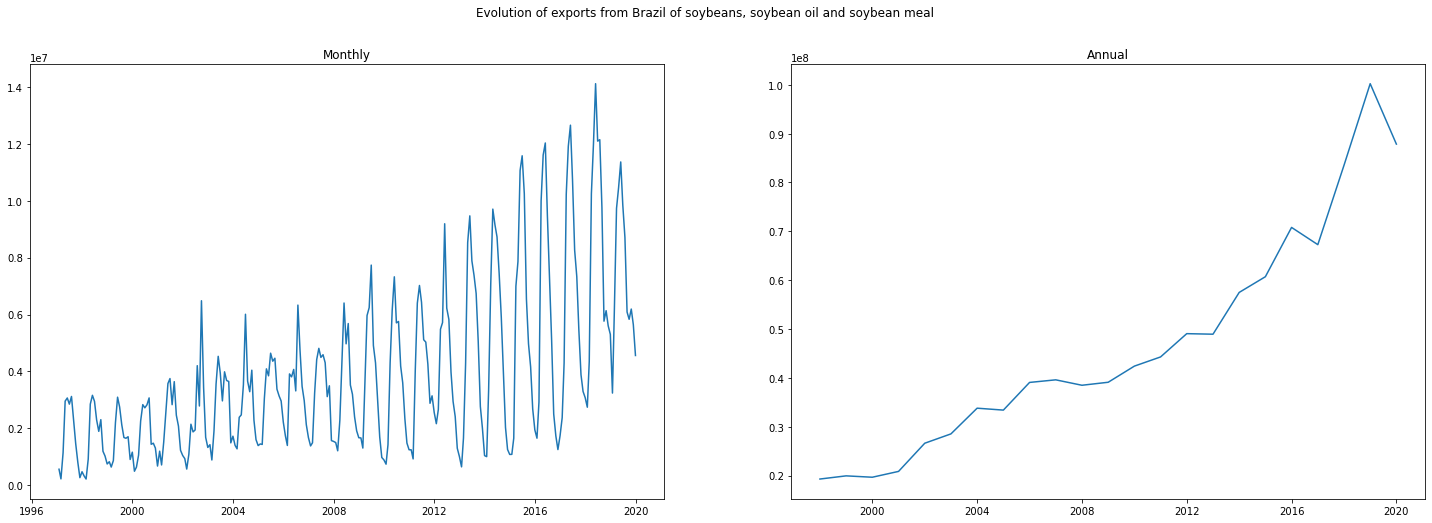

In [4]:
mask = ((df['product'] == 'soybeans') | (df['product'] == 'soybean_oil') | 
        (df['product'] == 'soybean_meal')) & (df['type'] == 'Export')
monthly = df.loc[mask, 'tons'].resample('M').sum()
annual = df.loc[mask, 'tons'].resample('Y').sum()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,8))
ax1.plot(monthly)
ax1.set_title('Monthly')
ax2.plot(annual)
ax2.set_title('Annual')
fig.suptitle('Evolution of exports from Brazil of soybeans, soybean oil and soybean meal')
plt.show()

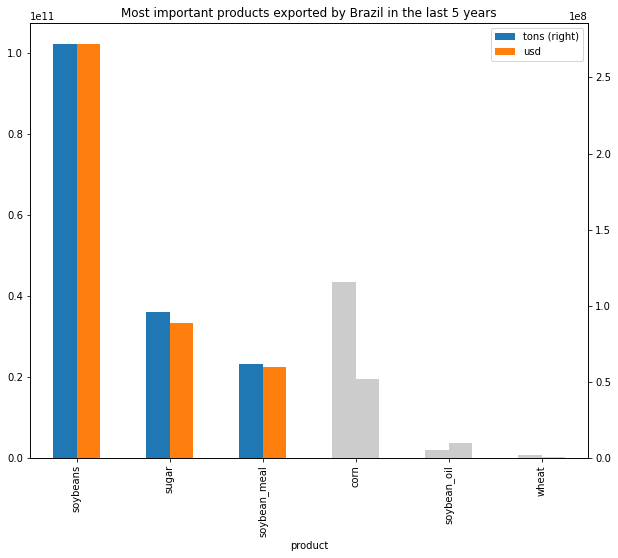

In [5]:
last5years_export = df.loc[(df.index.year > 2015) & (df['type']=='Export')]
last5years_export = last5years_export.groupby('product').sum()
last5years_export = last5years_export.sort_values(by='usd', ascending=False)
ax = last5years_export.plot(kind='bar', secondary_y= 'tons', figsize=(10, 8), 
                            title='Most important products exported by Brazil in the last 5 years')
for ax_ in ax.figure.axes:
    for bar in ax_.patches[3:]:
        bar.set_facecolor('#ccc')

In [6]:
print('Main routes through which Brazil have been exporting corn')
df.loc[(df['type']=='Export') & (df['product']=='corn')].groupby(['route'])['date'].count().sort_values(ascending=False)

Main routes through which Brazil have been exporting corn


route
Sea       13448
Ground     1830
Air         917
Other       731
River       468
Name: date, dtype: int64

<AxesSubplot:title={'center':'Importance of routes depending on the products'}, xlabel='route'>

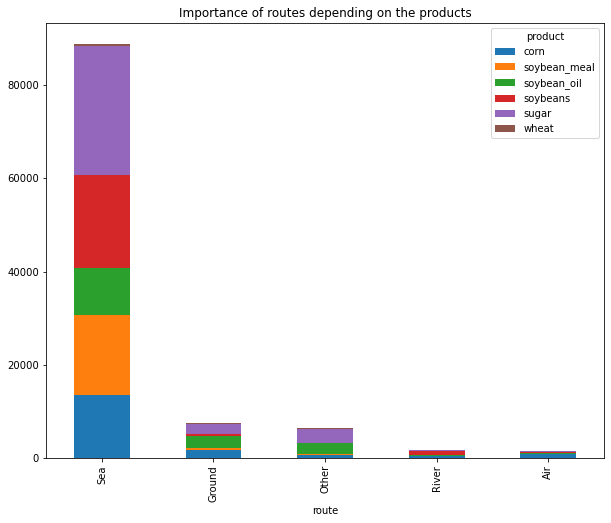

In [7]:
export_by_route = df.loc[df['type']=='Export'].groupby(['route', 'product'])['date']
export_by_route = export_by_route.count().unstack(fill_value=0)
export_by_route = export_by_route.assign(tmp=export_by_route.sum(axis=1))
export_by_route = export_by_route.sort_values('tmp', ascending=False).drop('tmp', 1)
export_by_route.plot(kind='bar', stacked=True, figsize=(10, 8), title='Importance of routes depending on the products')

<AxesSubplot:title={'center':'Most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years'}, xlabel='country'>

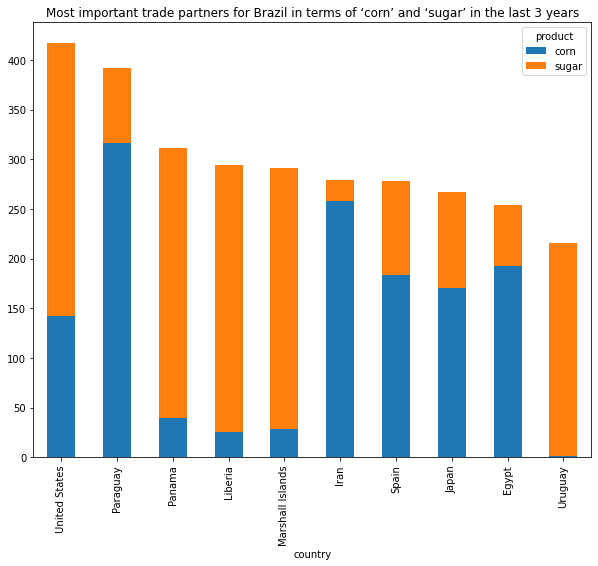

In [8]:
export_by_country = df.loc[(df.index.year > 2017) & 
                           ((df['product'] == 'corn') | 
                            (df['product'] == 'sugar'))]
export_by_country = export_by_country.groupby(['country', 
                                               'product'])['date']
export_by_country = export_by_country.count().unstack(fill_value=0)
export_by_country = export_by_country.assign(tmp=export_by_country.sum(axis=1))
export_by_country = export_by_country.sort_values('tmp', ascending=False).drop('tmp', 1)
export_by_country.head(10).plot(kind='bar', stacked=True, figsize=(10, 8), 
                               title='Most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years')

Text(0.5, 0.98, '5 most important states in terms of exports for each product')

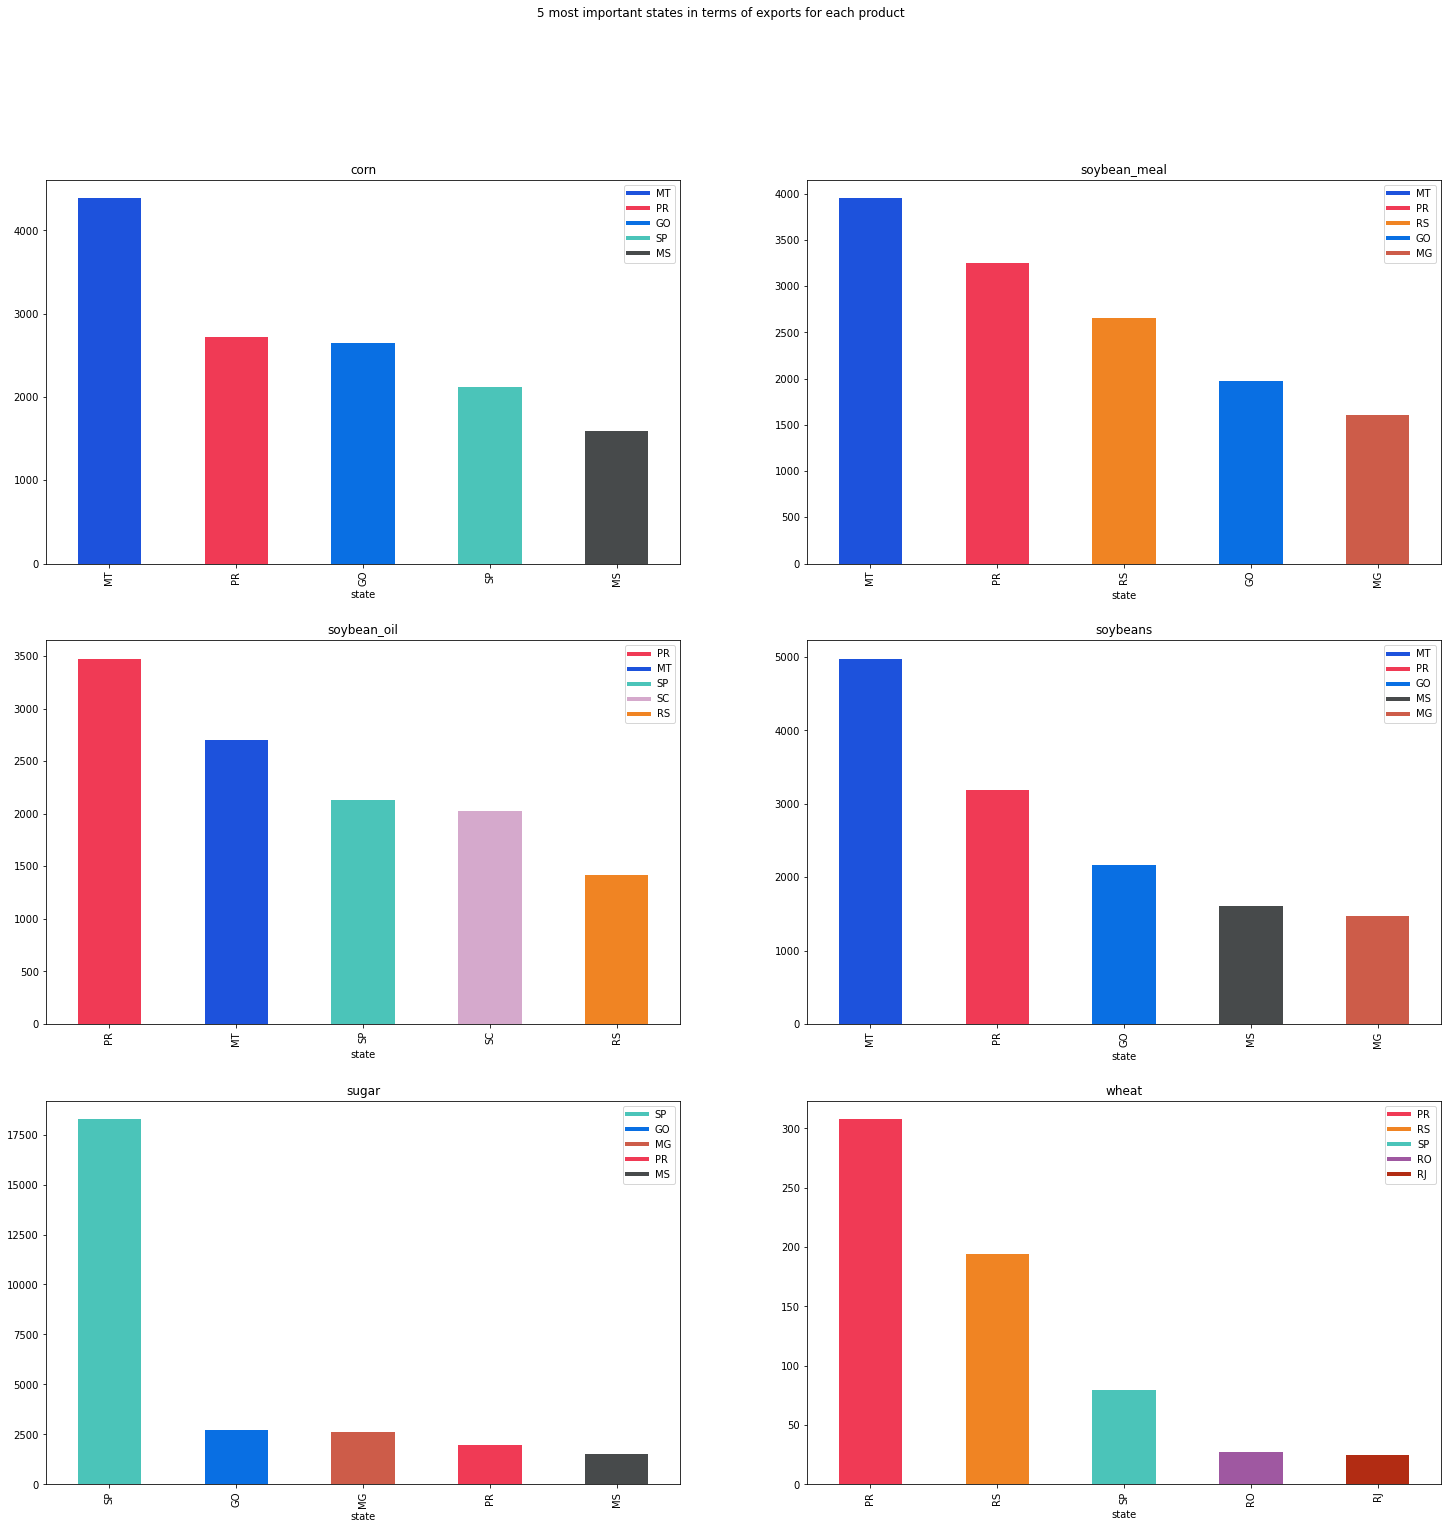

In [9]:
states_by_products = df.loc[(df['type'] == 'Export')].groupby(['state', 'product'])
states_by_products = states_by_products.count().sort_values(by=['product', 'date'], 
                                                            ascending=False)
states_by_products = states_by_products.groupby('product')['date'].head(5).unstack(fill_value=0)
colors = dict(zip(states_by_products.index, 
                  [(np.random.random(), np.random.random(), np.random.random()) 
                   for _ in states_by_products.index]))
fig, axs = plt.subplots(3, 2, figsize=(25, 24))
for product, ax in zip(states_by_products, axs.flatten()):
    sub = states_by_products[product].sort_values(ascending=False)
    sub = sub[sub > 0]
    x = sub.plot(kind='bar', ax=ax, title=product, color=[colors[i] for i in sub.index])
    custom_lines = [Line2D([0], [0], color=colors[i], lw=4) for i in sub.index]
    ax.legend(custom_lines, sub.index)
fig.suptitle('5 most important states in terms of exports for each product')